In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv('data/train.csv')

In [4]:
df_1 = df_train[df_train['store_nbr']==1]

# Is the time serie seasonnal ?

In [5]:
df_1_grouped = df_1.groupby(['date','family']).sum().reset_index()

In [6]:
df_1_grouped.head()

,date,family,id,store_nbr,sales,onpromotion
0,2013-01-01,AUTOMOTIVE,0,1,0.0,0
1,2013-01-01,BABY CARE,1,1,0.0,0
2,2013-01-01,BEAUTY,2,1,0.0,0
3,2013-01-01,BEVERAGES,3,1,0.0,0
4,2013-01-01,BOOKS,4,1,0.0,0


In [7]:
df_1.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

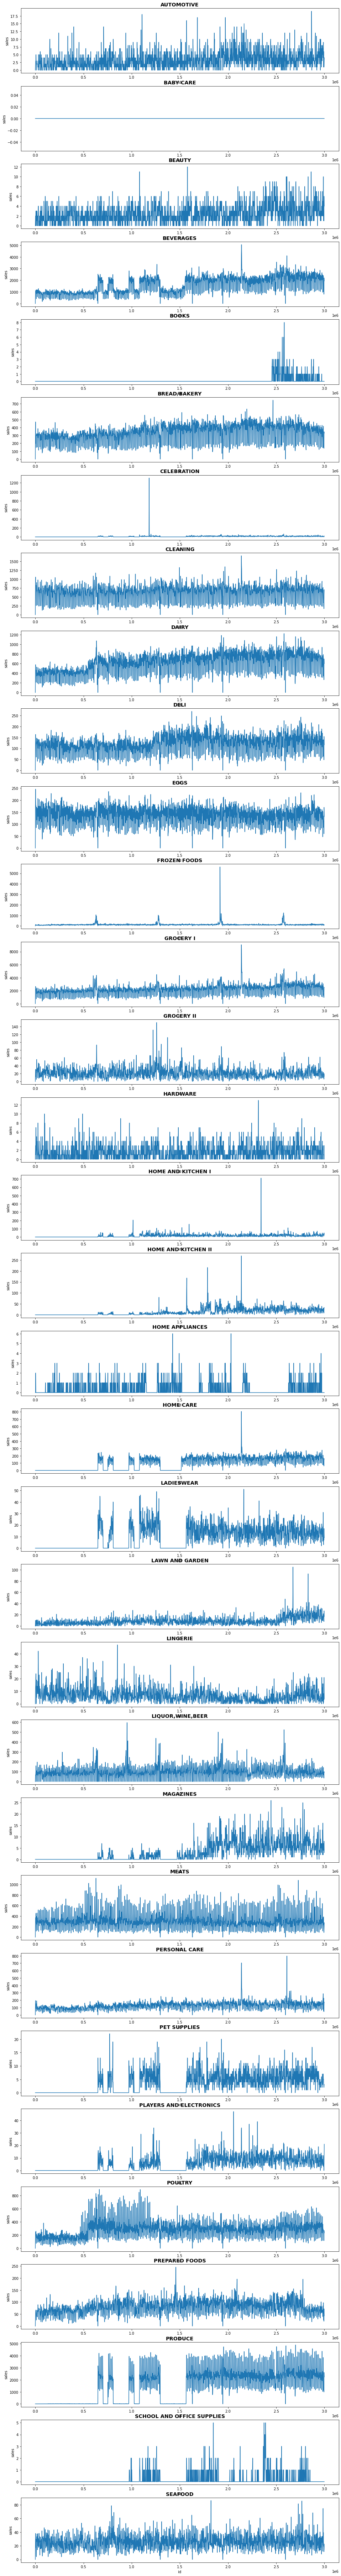

In [20]:
unique_columns = df_1.family.unique()
nunique_columns = df_1.family.nunique()


fig = plt.figure(figsize=(16,nunique_columns*4))
gs = fig.add_gridspec(nunique_columns,1)

for i, fam in enumerate(unique_columns):
    axn = fig.add_subplot(gs[i, 0])
    sns.lineplot(
        data=df_1_grouped[df_1_grouped['family']==fam],
        x='id',
        y='sales',
        ax=axn)
    axn.set_title(
        f"{fam}",
        fontdict={"fontsize": "x-large", "fontweight": "bold"},
    )